In [149]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

21) Suppose a coin has probability p of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near p. We will make this formal later. Take p = .3 and n = 1, 000 and simulate n coin flips. Plot the proportion of heads as a function of n. Repeat for p = .03.

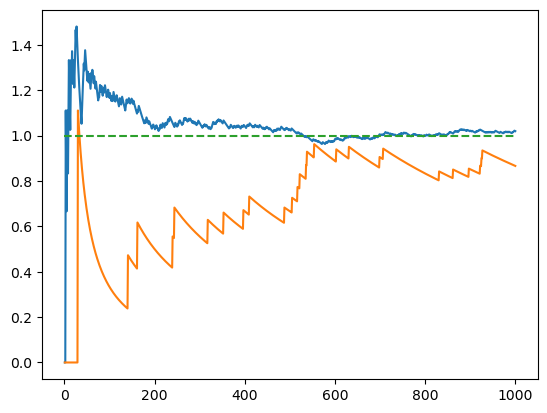

In [48]:
n=1000
ns = np.linspace(start=1,stop=n, num=n)

p_1 = 0.3
p_2 = 0.03

array_1 = np.array([np.random.choice(a=[0,1], p=[1 - p_1, p_1]) for _ in range(n)])
array_2 = np.array([np.random.choice(a=[0,1], p=[1 - p_2, p_2]) for _ in range(n)])

sums_1 = np.cumsum(array_1)
sums_2  = np.cumsum(array_2)

means_1 = sums_1/ns
means_2 = sums_2/ns

plt.plot(ns, means_1/p_1)
plt.plot(ns, means_2/p_2)
plt.plot([0,n], [1,1],'--')

plt.show()





They both converge to 1, but because the variance of the bernoulli trial with p=0.3 is smaller, this one converges faster.

22)  Suppose we flip a coin n times and let p denote the probability of heads. Let X be the number of heads. We call X a binomial random variable, which is discussed in the next chapter. Intuition suggests that X will be close to n p. To see if this is true, we can repeat this experiment many times and average the X values. Carry out a simulation and compare the average of the X’s to n p. Try this for p = .3 and n = 10, n = 100, and n = 1,000.

n = 10, p = 0.3, np = 3.0, X = 1.8


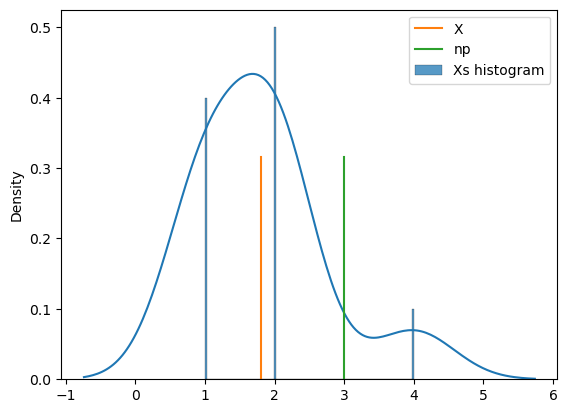

n = 100, p = 0.3, np = 30.0, X = 28.99


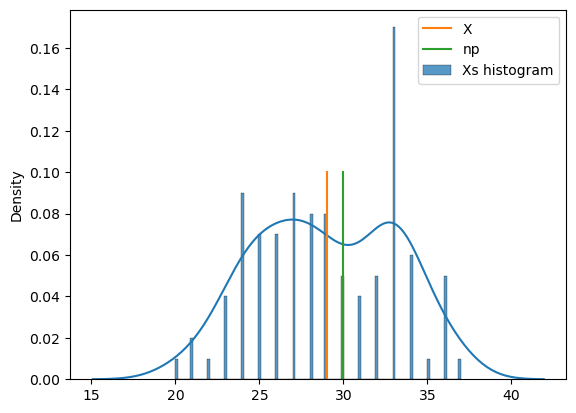

n = 1000, p = 0.3, np = 300.0, X = 299.836


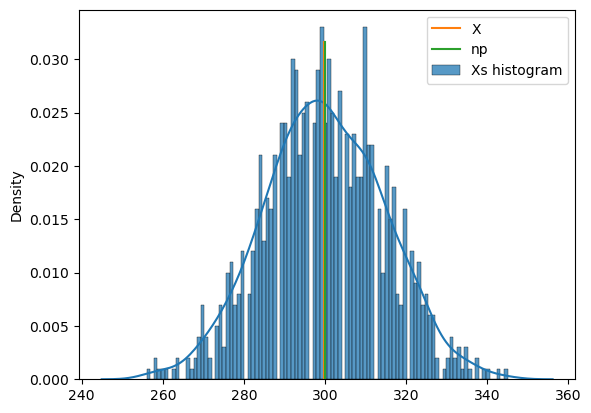

In [201]:
def binomial_experiment(n, p):
    arr = np.array([np.random.choice(a=[0, 1], p=[1-p, p]) for _ in range(n)])
    X = np.sum(arr)
    return X, arr

ns = [10, 100, 1000]
p = 0.3

for n in ns:
    sum = 0
    X_arr = np.empty(n)
    for i in range(n):
        X, _ = binomial_experiment(n, p)
        sum += X
        X_arr[i] = X
    
    print("n = {}, p = {}, np = {}, X = {}".format(n, p, n*p, sum/n))
    sns.kdeplot(X_arr)
    hist = sns.histplot(X_arr, label = "Xs histogram", bins=100, stat="probability")
    plt.plot([sum/n, sum/n], [0, 2/np.sqrt(n)], color = "C1", label = "X")
    plt.plot([n*p, n*p], [0, 2/np.sqrt(n)], color = "C2", label = "np")
    plt.legend()
    plt.show()



23) Here we will get some experience simulating
conditional probabilities. Consider tossing a fair die. Let A = {2, 4, 6}
and B = {1, 2, 3, 4}. Then, P(A)=1/2, P(B)=2/3 and P(AB)=1/3.
Since P(AB) = P(A)P(B), the events A and B are independent. Simulate draws from the sample space and verify that P(AB) = P(A)P(B)
where P(A) is the proportion of times A occurred in the simulation and
similarly for P(AB) and P(B). Now find two events A and B that are not
independent. Compute P(A), P(B) and P(AB). Compare the calculated
values to their theoretical values. Report your results and interpret.

Let H_0 be the hypothesis that P(AB) = 1/3 and H_1 be the hypothesis that P(AB) != 1/3

In [159]:
def dice_trial(As = [2, 4, 6], Bs = [1, 2, 3, 4], p = None):
    roll = np.random.choice([1, 2, 3, 4, 5, 6], p = p)
    A = roll in As
    B = roll in Bs
    AB = A and B
    return A, B, AB

n=100000

As = np.empty(n)
Bs = np.empty(n)
ABs = np.empty(n)

for i in range(n):
    As[i], Bs[i], ABs[i] = dice_trial()

ns=np.linspace(1, n, n)
A_means, B_means, AB_means = np.cumsum(As) / ns, np.cumsum(Bs) / ns, np.cumsum(ABs) / ns

A_mean, B_mean, AB_mean = A_means[-1], B_means[-1], AB_means[-1]
A_mean_std, B_mean_std, AB_mean_std = np.sqrt(1 / (n-1) * np.var(As)), np.sqrt(1 / (n-1) * np.var(Bs)), np.sqrt(1 / (n-1) * np.var(ABs))


print("n = {}\n".format(n))
print("Theoretical:\nA_mean: {}, B_mean: {}, AB_mean: {}, A_mean*B_mean: {}\n".format(0.5, 0.67, 0.33, 0.33))
print("Simulation:\nA_mean: {}, B_mean: {}, AB_mean: {}, A_mean*B_mean: {}".format(A_mean, B_mean, AB_mean, A_mean*B_mean))
print("error in A_mean: {}, error in B_mean: {}, error in AB_mean: {}\n".format(A_mean_std, B_mean_std, AB_mean_std))


significance_level = 0.05
theoretical_std = np.sqrt(2 / 9 / n)
lower_limit = 1/3 - norm.ppf(1 - significance_level / 2) * theoretical_std
upper_limit = 1/3 + norm.ppf(1 - significance_level / 2) * theoretical_std
print("result:")
print("significance interval = [{},{}], estimate of P(AB)={}".format(lower_limit, upper_limit, AB_mean))
print("accept H_0: P(AB)=1/3") if (lower_limit < AB_mean < upper_limit)  else print("reject_H0: P(AB)!=1/3")





n = 100000

Theoretical:
A_mean: 0.5, B_mean: 0.67, AB_mean: 0.33, A_mean*B_mean: 0.33

Simulation:
A_mean: 0.49967, B_mean: 0.66706, AB_mean: 0.33447, A_mean*B_mean: 0.33330987019999997
error in A_mean: 0.0015811463914638367, error in B_mean: 0.0014902790924245478, error in AB_mean: 0.001491985405828258

result:
significance interval = [0.33041159153141136,0.33625507513525527], estimate of P(AB)=0.33447
accept H_0: P(AB)=1/3


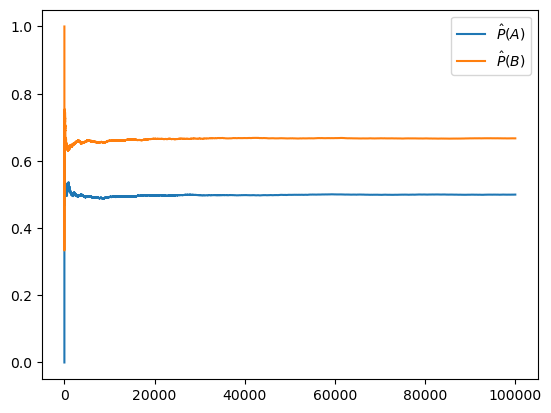

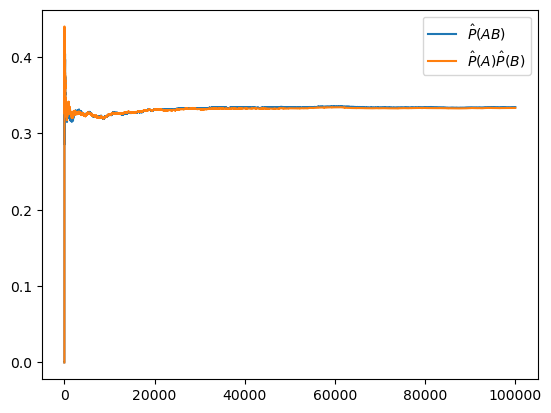

In [167]:
plt.plot(ns, A_means, label="$\hat{P}(A)$")
plt.plot(ns, B_means, label="$\hat{P}(B)$")
plt.legend()
plt.show()

plt.plot(ns, AB_means,  label="$\hat{P}(AB)$")
plt.plot(ns, A_means * B_means, label="$\hat{P}(A)\hat{P}(B)$")
plt.legend()
plt.show()

We see that the probabilities converge.